In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.isnull().sum()
#There are no null values present in dataset.

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
df['Class'].value_counts()/df['Class'].value_counts().sum()

0    0.998273
1    0.001727
Name: Class, dtype: float64

Class 0 - Non fraudalent cases are 99%

Class 1 - Fraudalent cases are 0.01%

That is the dataset is an imbalanced data set.

#### Find Correlation between features and target

In [7]:
np.corrcoef(df['V17'], df['Class'])

array([[ 1.        , -0.32648107],
       [-0.32648107,  1.        ]])

<BarContainer object of 30 artists>

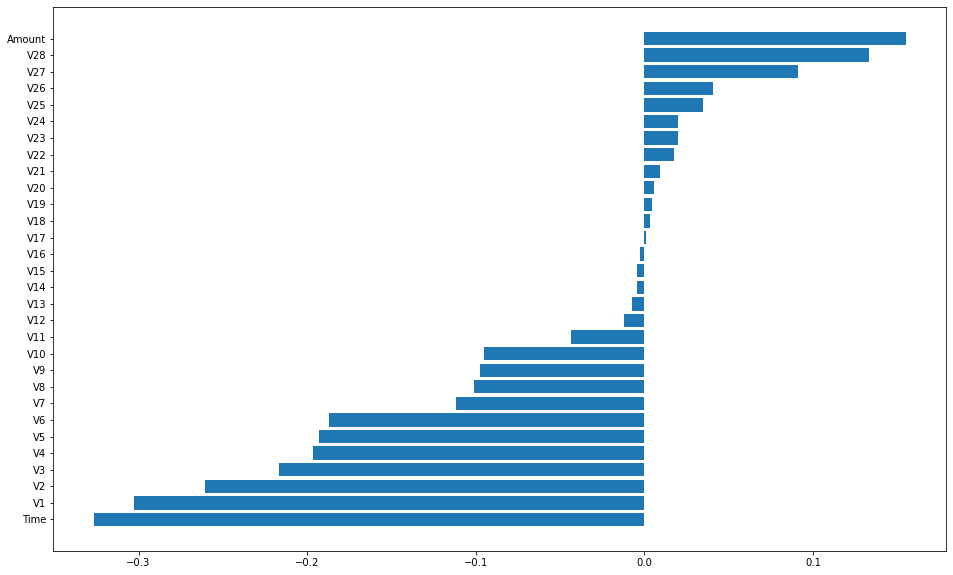

In [8]:
cols = df.describe().transpose().index
cols=cols.tolist()
cols.remove('Class')
corr_values=[]
for i in cols:
    corr_values.append(np.corrcoef(df[i], df['Class'])[0,1])
corr_values.sort()
fig,ax=plt.subplots(figsize=(16,10))
ax.barh(cols,corr_values)

Considering the features V14, v15, v16, v17, v18, v19 are not correlated to target feature, remove from the dataframe.

In [9]:
list1= ['V14','V15','V16','V17','V18', 'V19']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
from sklearn.metrics import recall_score,confusion_matrix,classification_report

In [11]:
X=df.drop(['Class'], axis=1)
X.drop(list1, axis=1, inplace=True)
y=df['Class']

#### Model creation before Resampling:

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [13]:
lgr = LogisticRegression()
lgr.fit(X_train, y_train)

LogisticRegression()

In [14]:
y_pred=lgr.predict(X_test)

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85304
           1       0.62      0.55      0.59       139

    accuracy                           1.00     85443
   macro avg       0.81      0.78      0.79     85443
weighted avg       1.00      1.00      1.00     85443



### Resampling:
In our dataset, the value counts are {0: 284315, 1: 492}

1. UnderSampling:

We will reduce the class 0 counts decreased from 284315 to 492

2. OverSampling:

We will increase  the class 0 counts increases from 492 to 284315


#### Random Under-Sampling: 

In [16]:
rus = RandomUnderSampler(random_state=42, replacement=False)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({0: 284315, 1: 492})
Resample dataset shape Counter({0: 492, 1: 492})


In [17]:
X_train,X_test,y_train,y_test = train_test_split(x_rus,y_rus,test_size=0.3,random_state=3)

In [18]:
lgr.fit(X_train, y_train)
y_pred=lgr.predict(X_test)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       157
           1       0.93      0.91      0.92       139

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296



#### Random Over-Sampling:

In [20]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

x_ros, y_ros = ros.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 284315, 1: 492})
Resample dataset shape Counter({0: 284315, 1: 284315})


In [21]:
X_train,X_test,y_train,y_test = train_test_split(x_ros,y_ros,test_size=0.3,random_state=3)

In [22]:
lgr.fit(X_train, y_train)
y_pred=lgr.predict(X_test)

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     85168
           1       0.93      0.87      0.90     85421

    accuracy                           0.90    170589
   macro avg       0.90      0.90      0.90    170589
weighted avg       0.90      0.90      0.90    170589



#### SMOTE: Synthetic Minority Oversampling Techique
It is a oversampling technique.

In [24]:
smote = SMOTE()
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 284315, 1: 492})
Resample dataset shape Counter({0: 284315, 1: 284315})


In [25]:
X_train,X_test,y_train,y_test = train_test_split(x_smote,y_smote,test_size=0.3,random_state=0)

In [26]:
lgr.fit(X_train, y_train)

LogisticRegression()

In [27]:
y_pred = lgr.predict(X_test)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96     85172
           1       0.96      0.95      0.96     85417

    accuracy                           0.96    170589
   macro avg       0.96      0.96      0.96    170589
weighted avg       0.96      0.96      0.96    170589



#### Model selection

Performing Gradient boosting algorithm to predict the output using smote oversampling.

In [31]:
GBR = GradientBoostingClassifier(n_estimators=50,  max_depth=2).fit(X_train, y_train)

In [32]:
y_pred=GBR.predict(X_test)
recall_score(y_pred,y_test)

0.9857819331242204

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     85172
           1       0.99      0.95      0.97     85417

    accuracy                           0.97    170589
   macro avg       0.97      0.97      0.97    170589
weighted avg       0.97      0.97      0.97    170589

